# Red Wine Quality 


### About the Dataset
- This dataset is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. 
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

### Input variables (based on physicochemical tests):

1. **fixed acidity**

    - Most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2. **volatile acidity**
    - The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3. **citric acid**
    - Found in small quantities, citric acid can add 'freshness' and flavor to wines.

4. **residual sugar**
    - The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

5. **chlorides**
    - The amount of salt in the wine

6. **free sulfur dioxide**
    - The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. **total sulfur dioxide**
    - Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

8. **density**
    - The density of water is close to that of water depending on the percent alcohol and sugar content.

9. **pH**
    - Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

10. **sulphates**
    - A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and

11. **alcohol**
    - The percent alcohol content of the wine.

### Output variable (based on sensory data):

12. **quality (score between 0 and 10)**
    - Output variable (based on sensory data, score between 0 and 10).

### Task
**Determine what qualities constitute a good wine using machine learning model.**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, log_loss
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    auc,
)
from sklearn.decomposition import PCA
from IPython.display import display

## Dataset Overview

In [2]:
file_path = "winequality-red.csv"
df = pd.read_csv(file_path)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Data Cleaning

### Missing Values 

In [4]:
missing_values = df.isnull().sum()

summary_stats = df.describe()

missing_values, summary_stats

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          c

### Outliers

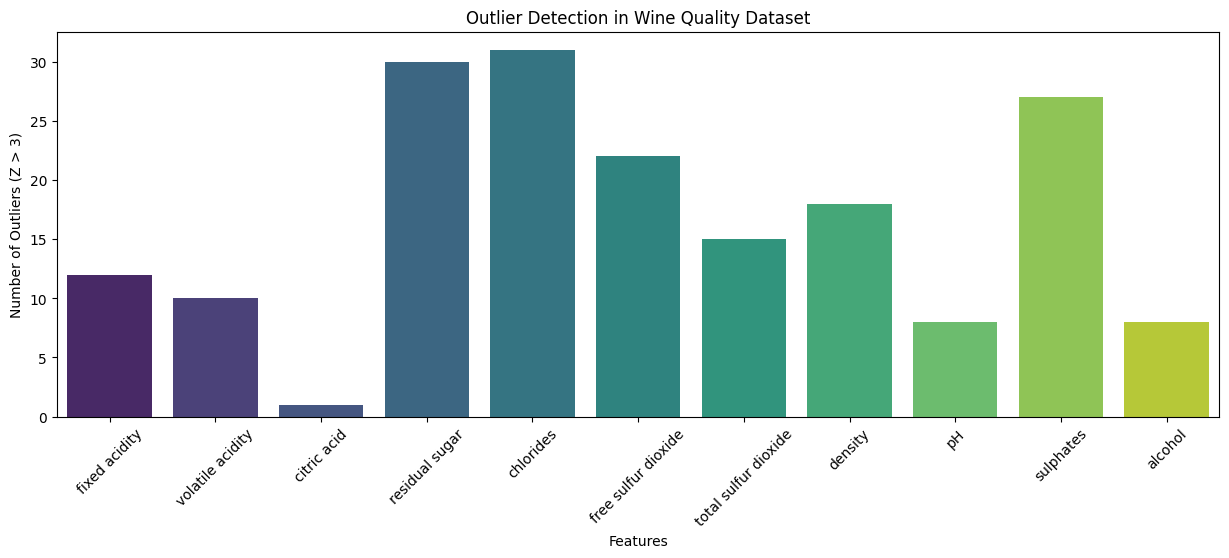

In [5]:
X = df.drop(columns=["quality"])
numeric_cols = X.columns

z_scores = np.abs((X - X.mean()) / X.std())

outliers = (z_scores > 3).sum()

plt.figure(figsize=(15, 5))
sns.barplot(
    x=outliers.index,
    y=outliers.values,
    palette="viridis",
    hue=outliers.index,
    legend=False,
)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Number of Outliers (Z > 3)")
plt.title("Outlier Detection in Wine Quality Dataset")
plt.show()

- Residual Sugar & Chlorides have the most outliers. Wines with very high sugar or chloride levels are rare.

- Sulphates also show a significant number of outliers. Could indicate wine preservation anomalies.

- Citric Acid has very few outliers, meaning it is normally distributed.

- Outliers in Total Sulfur Dioxide & Density may affect model stability.

#### Handling Outliers by log transformation to preserve data. 

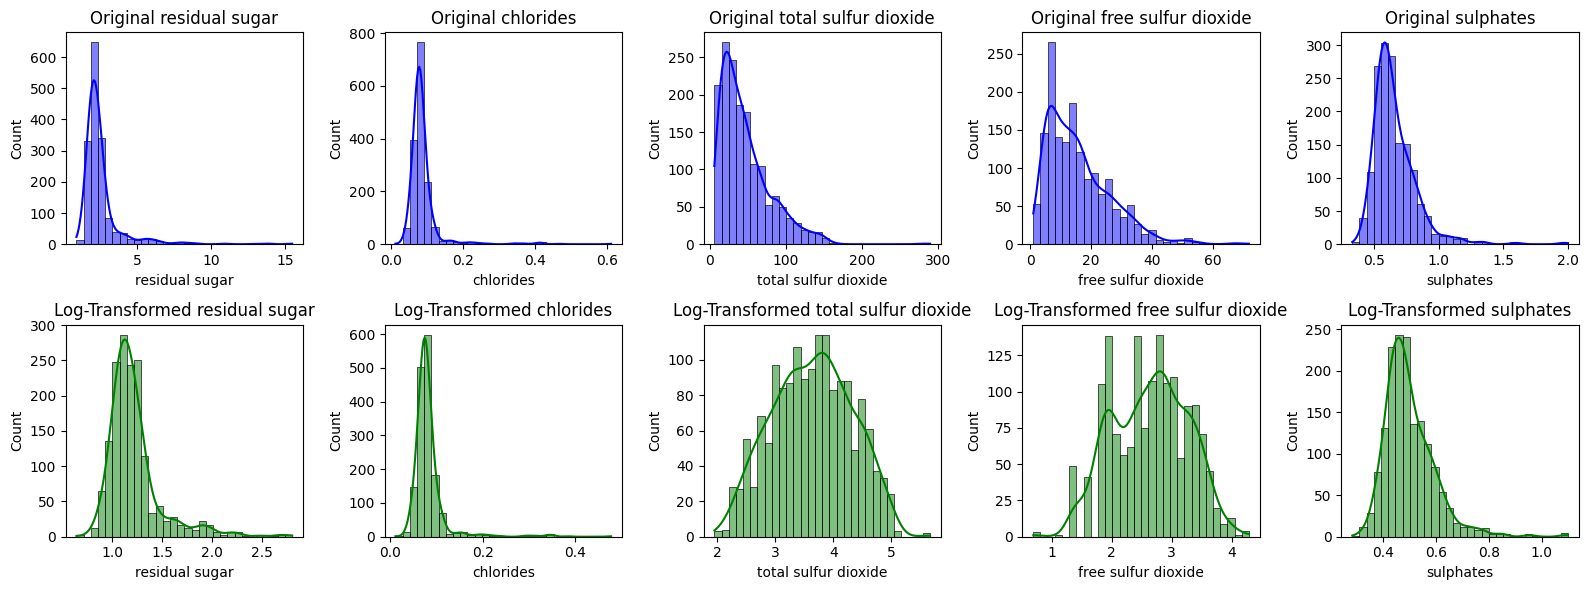

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,9.4,5
1,7.8,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.518794,9.8,5
2,7.8,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.500775,9.8,5
3,11.2,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.457425,9.8,6
4,7.4,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.444686,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.457425,10.5,5
1595,5.9,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.565314,11.2,6
1596,6.3,0.510,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.559616,11.0,6
1597,5.9,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.536493,10.2,5


In [6]:
log_transformed_features = [
    "residual sugar",
    "chlorides",
    "total sulfur dioxide",
    "free sulfur dioxide",
    "sulphates",
]

df_log_transformed = df.copy()
df_log_transformed[log_transformed_features] = np.log1p(
    df_log_transformed[log_transformed_features]
)

fig, axes = plt.subplots(2, len(log_transformed_features), figsize=(16, 6))

for i, feature in enumerate(log_transformed_features):
    sns.histplot(df[feature], bins=30, ax=axes[0, i], kde=True, color="blue")
    axes[0, i].set_title(f"Original {feature}")

    sns.histplot(
        df_log_transformed[feature], bins=30, ax=axes[1, i], kde=True, color="green"
    )
    axes[1, i].set_title(f"Log-Transformed {feature}")

plt.tight_layout()
plt.show()

display(df_log_transformed)

- The original distributions were highly skewed (right-skewed, long tails).

- The log transformation reduces skewness and makes the data closer to a normal distribution.

## EDA

### Distribution of wine quality scores 

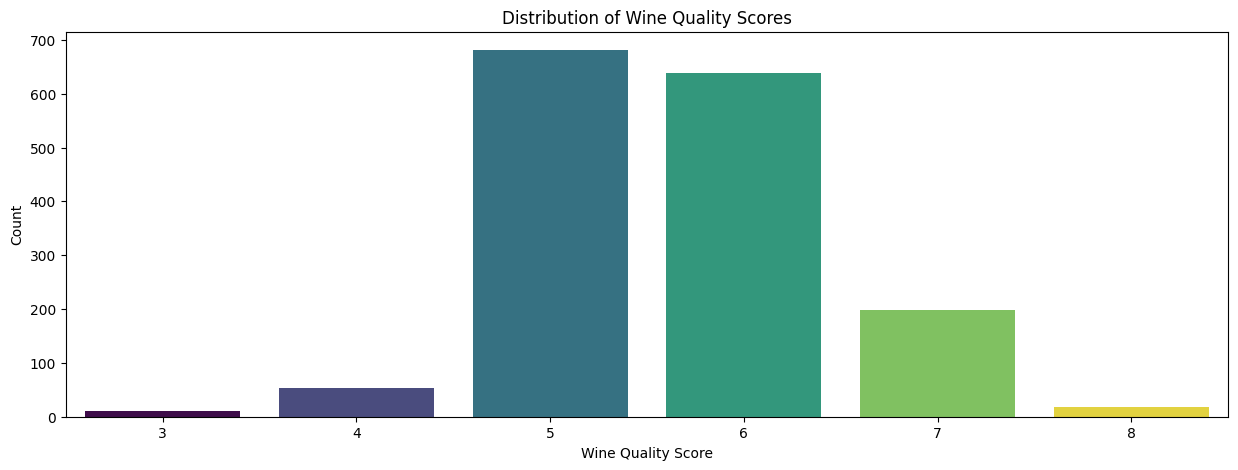

In [7]:
plt.figure(figsize=(15, 5))

sns.countplot(x=df["quality"], palette="viridis", hue=df["quality"], legend=False)

plt.xlabel("Wine Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")

plt.show()

**Class Imbalance Observation:**
- Most wines are rated 5 or 6, making up the majority of the dataset.

- Higher quality wines (7 and 8) are significantly fewer.

- Lower quality wines (3 and 4) are also rare.


### Hypothesis Statement

**Null Hypothesis (H₀):** The physicochemical properties of wine do not significantly impact whether a wine is classified as good or not.

**Alternative Hypothesis (H₁):** At least some of the physicochemical properties significantly influence wine quality.


## Linear Regression Model

### Checking for Multicollinearity

In [8]:
X = df.drop(columns=["quality"])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
                 Feature          VIF
0          fixed acidity    74.452265
1       volatile acidity    17.060026
2            citric acid     9.183495
3         residual sugar     4.662992
4              chlorides     6.554877
5    free sulfur dioxide     6.442682
6   total sulfur dioxide     6.519699
7                density  1479.287209
8                     pH  1070.967685
9              sulphates    21.590621
10               alcohol   124.394866


**Key Observations from the VIF Table**

- `Density` (VIF = 1479.29) and `pH` (VIF = 1070.97): These variables have extremely high VIF values, suggesting a very high degree of multicollinearity.


- `Alcohol` (VIF = 124.39), `Fixed Acidity` (VIF = 74.45), and `Sulphates` (VIF = 21.59): Also show high multicollinearity, though lower than density and pH.


- `Volatile Acidity` (VIF = 17.00) and `Citric Acid` (VIF = 9.18): Moderate multicollinearity.


- `Residual Sugar`, `Chlorides`, `Free Sulfur Dioxide`, and `Total Sulfur Dioxide` (VIF < 7): These variables have relatively low VIF values, suggesting minimal multicollinearity.


### PAC to handle Multicollinearity

In [9]:
X_log_transformed = df_log_transformed.drop(columns=["quality"])
y_log_transformed = df_log_transformed["quality"]

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_log_transformed, y_log_transformed, test_size=0.2, random_state=42
)

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_log)
X_test_pca = pca.transform(X_test_log)

### Linear Regression

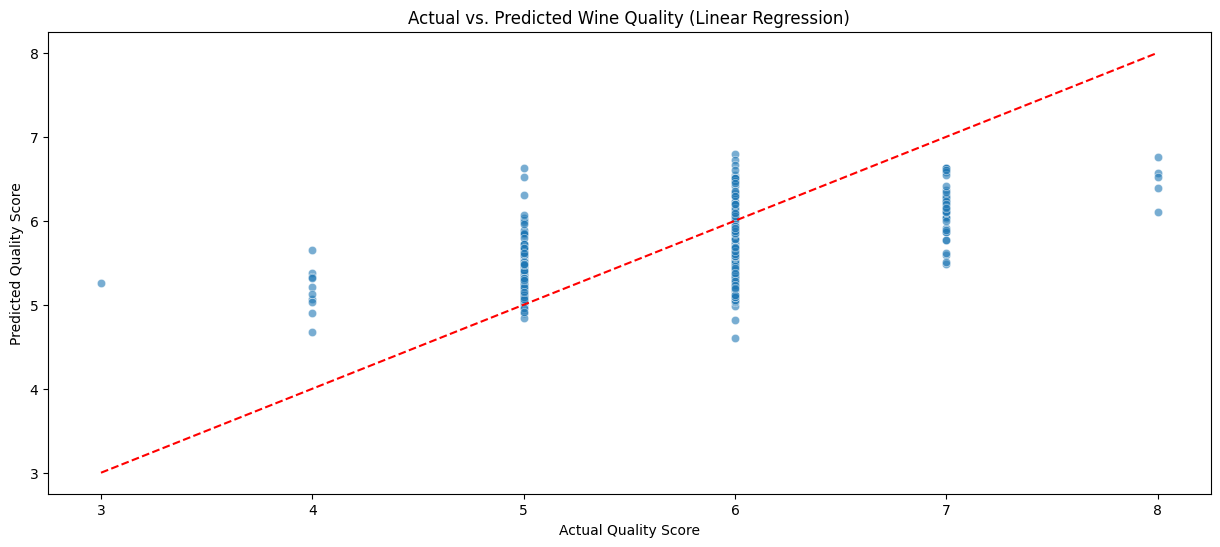

,Metric,Value
0,Mean Squared Error,0.425159
1,R-squared Score,0.349418


In [10]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_pca, y_train_log)

y_pred_log = lin_reg_model.predict(X_test_pca)

mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

plt.figure(figsize=(15, 6))
sns.scatterplot(x=y_test_log, y=y_pred_log, alpha=0.6)
plt.xlabel("Actual Quality Score")
plt.ylabel("Predicted Quality Score")
plt.title("Actual vs. Predicted Wine Quality (Linear Regression)")
plt.plot(
    [y_test_log.min(), y_test_log.max()],
    [y_test_log.min(), y_test_log.max()],
    color="red",
    linestyle="--",
)
plt.show()

model_performance_lin_reg = pd.DataFrame(
    {"Metric": ["Mean Squared Error", "R-squared Score"], "Value": [mse_log, r2_log]}
)

display(model_performance_lin_reg)

### Linear Regression Model Results

**Mean Squared Error (MSE): `0.4251`**
- This represents the average squared difference between actual and predicted wine quality scores.
- Lower MSE is better since the closer to 0 means the better the fit.

**R-squared Score (R²): `0.3494`**
- Indicates that ~ 35% of the variance in wine quality is explained by the model.
- Since R² is relatively low, this suggests a linear model may not fully capture the complexity of wine quality factors.


#### Observations from Actual vs. Predicted Scatter Plot
- The red diagonal line represents perfect predictions.
- Many points deviate from this line, indicating prediction errors.
- The spread suggests a need for more complex modeling techniques (e.g., polynomial regression, decision trees, or ensemble methods).


### Correlation Matrix

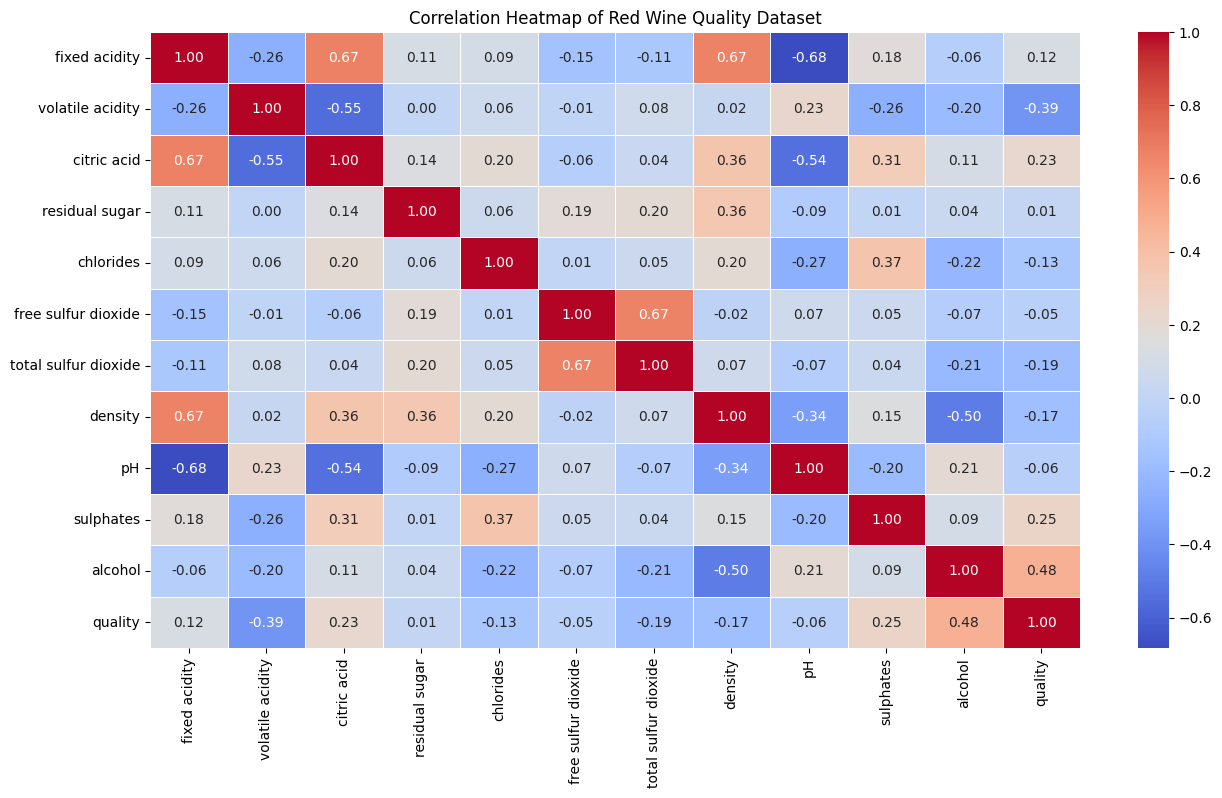

In [11]:
plt.figure(figsize=(15, 8))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Red Wine Quality Dataset")
plt.show()

##### Strongest Positive Correlations with Wine Quality:
**Alcohol (`+0.48`)** - Higher alcohol content is associated with better wine quality.

**Sulphates (`+0.25`)** - Likely due to its role in wine preservation and taste enhancement.

**Citric Acid (`+0.23`)** - Adds freshness and acidity to wine.

##### Strongest Negative Correlations with Wine Quality:
**Volatile Acidity (`-0.39`)** - Higher acidity often gives a vinegar-like taste, reducing quality.

**Total Sulfur Dioxide (`-0.20`)** - Preservative effect, but too much negatively impacts quality.

**Density (`-0.17`)** - Higher density wines tend to have lower quality.

##### Low or Insignificant Correlations:
pH, Residual Sugar, and Free Sulfur Dioxide have weak correlations with quality.

### Binary Classification of Wine Quality

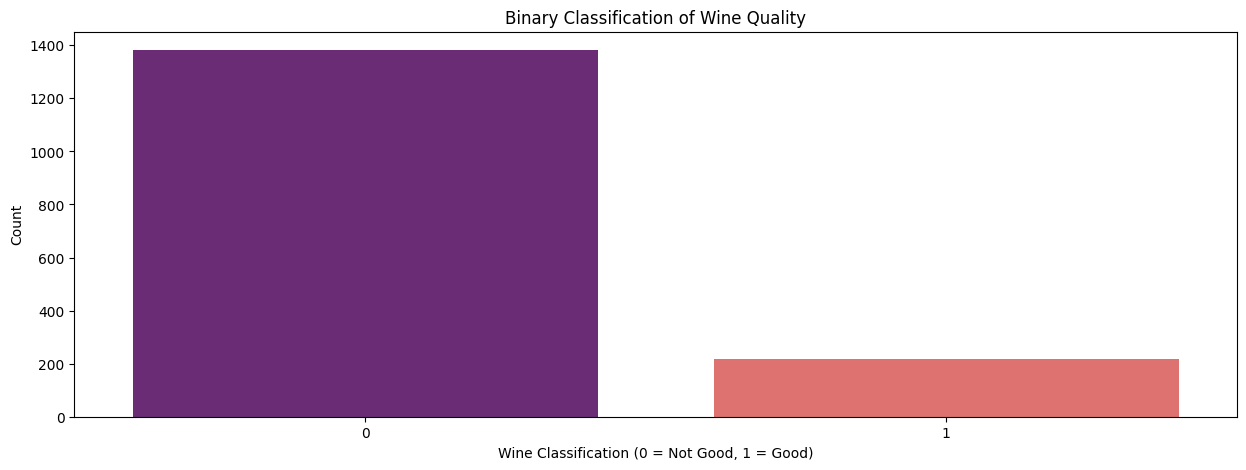

,proportion
good_wine,
0,86.429018
1,13.570982


In [12]:
df_log_transformed["good_wine"] = (df_log_transformed["quality"] >= 7).astype(int)

class_distribution = df_log_transformed["good_wine"].value_counts(normalize=True) * 100
class_distribution_df = pd.DataFrame(class_distribution).rename(
    columns={"good_wine": "Percentage"}
)

plt.figure(figsize=(15, 5))
sns.countplot(
    x=df_log_transformed["good_wine"],
    palette="magma",
    hue=df_log_transformed["good_wine"],
    legend=False,
)
plt.xlabel("Wine Classification (0 = Not Good, 1 = Good)")
plt.ylabel("Count")
plt.title("Binary Classification of Wine Quality")

plt.show()

display(class_distribution_df)

- Class 0 ("Not Good" Wines): 86.43% of the dataset. 
- Class 1 ("Good" Wines): 13.57% of the dataset.

**Key Insight**

- Severe class imbalance → The model may favor "Not Good" wines (majority class).
- Potential solution: Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset before training the Random Forest model.

## Data Splitting

In [13]:
X = df_log_transformed.drop(columns=["quality", "good_wine"])
y = df_log_transformed["good_wine"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

train_distribution = y_train.value_counts(normalize=True) * 100
test_distribution = y_test.value_counts(normalize=True) * 100

class_split_comparison = pd.DataFrame(
    {"Train Set (%)": train_distribution, "Test Set (%)": test_distribution}
)

print("\nClass Distribution in Train and Test Sets:")
display(class_split_comparison)


Class Distribution in Train and Test Sets:


,Train Set (%),Test Set (%)
good_wine,,
0,86.395622,86.5625
1,13.604378,13.4375


Data Split Summary:
Training Set: 1,279 samples (80% of data)
Test Set: 320 samples (20% of data)
Each dataset retains 11 independent variables.

## Logistic regression

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit_model = LogisticRegression(class_weight="balanced", random_state=42)
logit_model.fit(X_train_scaled, y_train)

X_train_const = sm.add_constant(X_train_scaled)
X_train_const = pd.DataFrame(
    X_train_const, columns=["Intercept"] + list(X_train.columns)
)

X_train_const = X_train_const.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

logit_model_sm = sm.Logit(y_train, X_train_const)
result = logit_model_sm.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.274379
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              good_wine   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1267
Method:                           MLE   Df Model:                           11
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.3101
Time:                        09:36:37   Log-Likelihood:                -350.93
converged:                       True   LL-Null:                       -508.68
Covariance Type:            nonrobust   LLR p-value:                 4.734e-61
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8250      0.157    -17.964      0.000      -3.133      -2.517

### Insights

**Model fit Stats**
Pseudo R-squared: 0.3101 indicates that 31.01% of the variation in wine quality is explained by the model.

Log-Likelihood: -350.93 a higher (less negative) value is preferred, but this alone is not enough to judge model performance.

LL-Null: -508.68 log-likelihood of a model with only the intercept (no predictors).

LLR p-value: 4.734e-61 very small p-value (< 0.05) means that at least one predictor significantly contributes to the model.

**Significant Predictors (p < 0.05):**

Volatile Acidity (-): Higher values hurt wine quality.

Residual Sugar (+): More sugar improves the odds.

Chlorides (-): Higher chlorides lower quality.

Free Sulfur Dioxide (+): Higher values improve quality.

Total Sulfur Dioxide (-): More total sulfur dioxide hurts quality.

Sulphates (+): Strongest positive predictor.

Alcohol (+): Most important feature for predicting good wine.

**Non-Significant Predictors (p > 0.05):**

Fixed Acidity, Citric Acid, Density, pH → No clear effect.


### Dropping non signficant variables

In [15]:
significant_features = [
    "volatile acidity",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "sulphates",
    "alcohol",
]

selected_indices = [X_train.columns.get_loc(col) for col in significant_features]

X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

X_train_const = pd.DataFrame(X_train_selected, columns=significant_features)
X_train_const.insert(0, "Intercept", 1)

logit_model_sm = sm.Logit(y_train, X_train_const)
result = logit_model_sm.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.277663
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              good_wine   No. Observations:                 1279
Model:                          Logit   Df Residuals:                     1271
Method:                           MLE   Df Model:                            7
Date:                Wed, 05 Mar 2025   Pseudo R-squ.:                  0.3019
Time:                        09:36:37   Log-Likelihood:                -355.13
converged:                       True   LL-Null:                       -508.68
Covariance Type:            nonrobust   LLR p-value:                 1.845e-62
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.8174      0.155    -18.125      0.000      -3.122      -2.513

### Model Performance and Threshold Comparison. 

In [16]:
X_test_const = pd.DataFrame(X_test_selected, columns=significant_features)
X_test_const.insert(0, "Intercept", 1)

y_test_probs = result.predict(X_test_const)

thresholds = [0.4, 0.5, 0.6, 0.7, 0.8]
threshold_results = []

for t in thresholds:
    y_test_pred_adjusted = (y_test_probs >= t).astype(int)
    precision = precision_score(y_test, y_test_pred_adjusted, zero_division=0)
    recall = recall_score(y_test, y_test_pred_adjusted)
    accuracy = accuracy_score(y_test, y_test_pred_adjusted)
    threshold_results.append([t, accuracy, precision, recall])

threshold_df = pd.DataFrame(
    threshold_results, columns=["Threshold", "Accuracy", "Precision", "Recall"]
)

display(threshold_df)

,Threshold,Accuracy,Precision,Recall
0,0.4,0.884375,0.615385,0.372093
1,0.5,0.890625,0.681818,0.348837
2,0.6,0.890625,0.833333,0.232558
3,0.7,0.875000,1.000000,0.069767
4,0.8,0.871875,1.000000,0.046512


**Insights**

1. **Trade-Off Between Precision and Recall**
- As threshold increases, precision improves, but recall decreases.

- At threshold = 0.4, recall is high (0.37) but precision is lower (0.61).

- At threshold = 0.8, precision is perfect (1.0) but recall drops significantly (0.04).
This is expected because a higher threshold means the model is more conservative in predicting "good wine" (reducing false positives), but at the cost of missing more actual good wines (increasing false negatives).

2. **Accuracy Remains Fairly Stable** 
- Accuracy stays around 88-89% across thresholds, meaning the overall classification performance is stable.

- However, accuracy alone isn't the best metric due to class imbalance. A model can be accurate but still biased.

3. **Best Threshold Choice?**
- If precision matters most (i.e., you only want to predict "good wine" when you’re highly certain), threshold 0.7 or 0.8 is best.

- If recall matters most (you don’t want to miss good wines), threshold 0.4 or 0.5 is better.

In [17]:
log_loss_value = log_loss(y_test, y_test_probs)
print(f"Log Loss: {log_loss_value:.4f}")

Log Loss: 0.2438


### Confusion Matrix

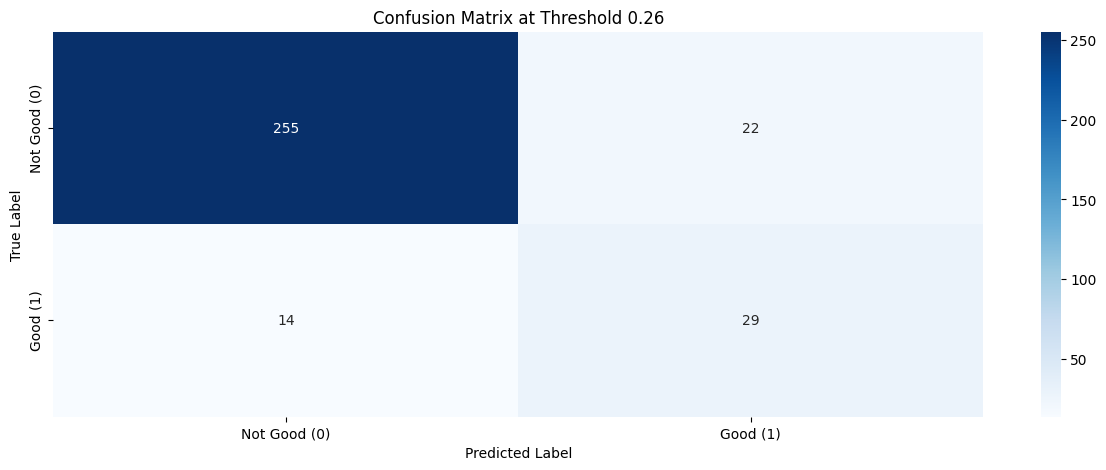

In [18]:
y_test_pred_final = (y_test_probs >= 0.26).astype(int)

class_labels = ["Not Good (0)", "Good (1)"]

conf_matrix = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(15, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels,
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix at Threshold 0.26")
plt.show()

**Interpretation of the Confusion Matrix**

- True Negatives (`TN = 255`): The model correctly classified 255 wines as "Not Good".

- False Positives (`FP = 22`): 22 wines were misclassified as "Good" when they were actually "Not Good".

- False Negatives (`FN = 14`): 14 wines were misclassified as "Not Good" when they were actually "Good".

- True Positives (`TP = 29`): The model correctly classified 29 wines as "Good".

**Conclusion**
- Threshold 0.26 provides a better balance between precision and recall.

- It reduces false positives (fewer bad wines misclassified as good), which is important for quality control.
Although it slightly misses more good wines, the precision improvement outweighs the recall drop.

- Best use case: When the goal is to minimize the risk of recommending bad wine while still capturing good ones with reasonable recall

### Classification Report

In [19]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred_final))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       277
           1       0.57      0.67      0.62        43

    accuracy                           0.89       320
   macro avg       0.76      0.80      0.78       320
weighted avg       0.90      0.89      0.89       320



**Precision (for class 1 - "Good" wines): 0.57**
- Out of all the wines the model predicted as "Good", 57% were actually "Good".

- Lower precision means there are still False Positives (FP) (wines misclassified as "Good" when they aren't).

**Recall (for class 1 - "Good" wines): 0.67**

- Out of all the actual "Good" wines, the model correctly identified 67%.
This means False Negatives (FN) (actual "Good" wines misclassified as "Not Good") are moderate.

**Overall Metrics:**

- Accuracy: `0.89` 89% of total predictions were correct.

- Macro Average (`0.76 Precision`, `0.80 Recall`, `0.78 F1-Score`) Unweighted average, treating both classes equally.

- Weighted Average (`0.90 Precision`, `0.89 Recall`, `0.89 F1-Score`)
Takes class imbalance into account. It’s higher because the "Not Good" class dominates the dataset.

### Precision - Recall curve

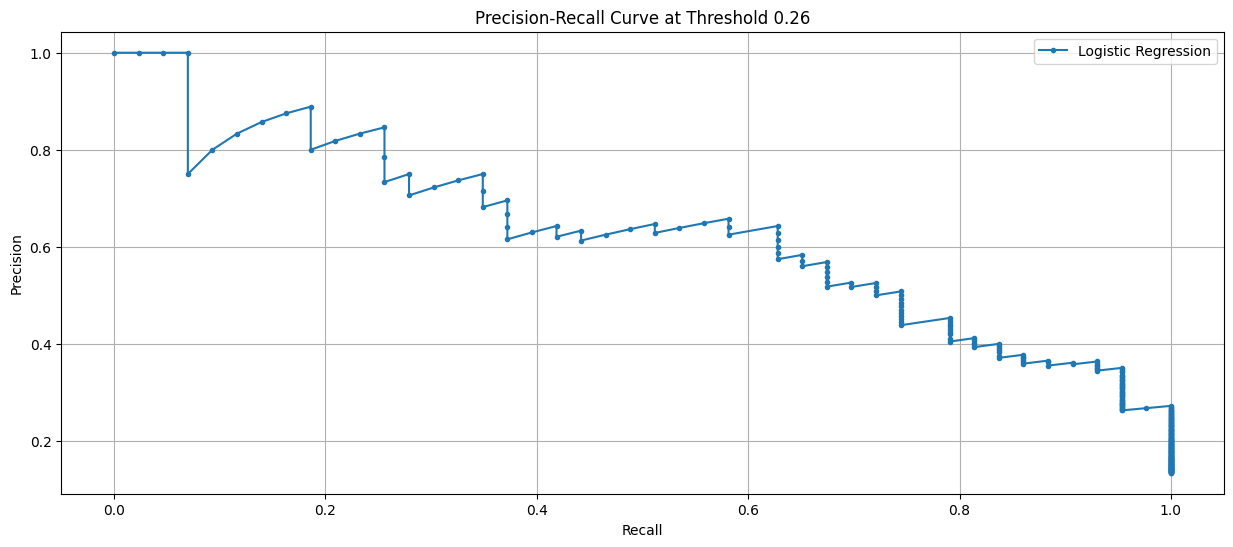

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_probs)

plt.figure(figsize=(15, 6))
plt.plot(recall, precision, marker=".", label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve at Threshold 0.26")
plt.legend()
plt.grid()
plt.show()

##### **Key Takeaways from the PR Curve**
**Inverse Relationship Between Precision and Recall** 
- As recall increases (right side of the plot), precision decreases.
- This is expected: when we classify more samples as "Good" (higher recall), we also make more mistakes (lower precision).

**Sharp Drops in Precision at Certain Recall Points**
- The curve shows noticeable drops in precision at specific recall values.
- This suggests that beyond a certain threshold, the model struggles to maintain precision while improving recall.

**Ideal Model Behavior**
- A perfect model would maintain high precision across all recall values, meaning it classifies "Good" wines correctly without also classifying "Not Good" wines incorrectly.
- Here, precision remains above 0.6 for much of the curve, which is decent.

### ROC - AUC curve

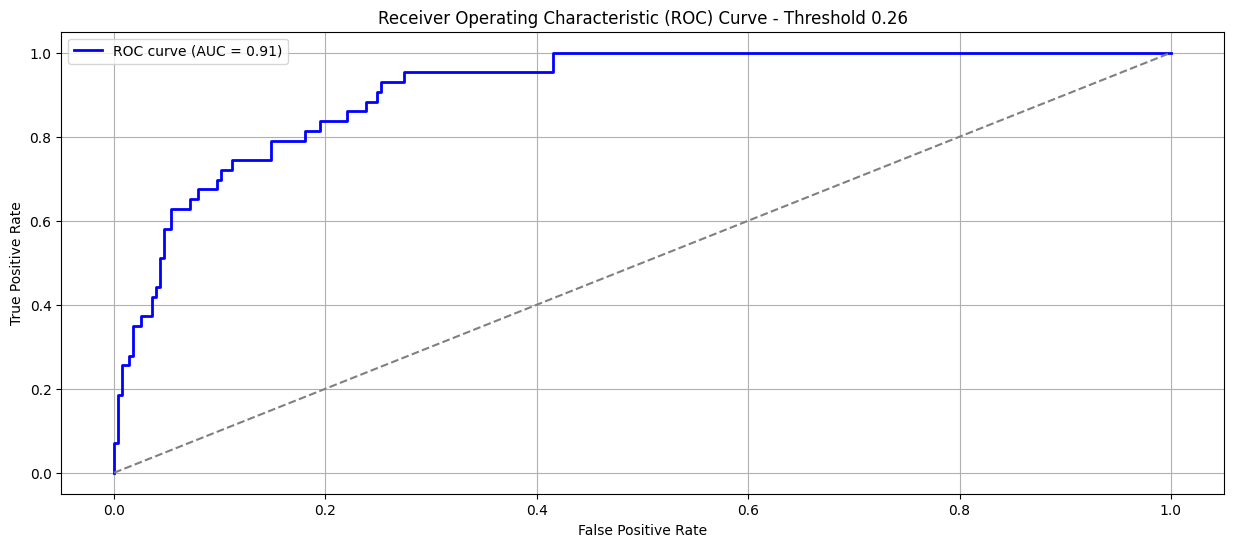

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_test_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve - Threshold 0.26")
plt.legend()
plt.grid()
plt.show()

**Key Insights**
- The curve shows that at lower FPR, the TPR remains high, meaning the model correctly identifies a large portion of "Good" wines without misclassifying too many "Not Good" wines.

- `AUC = 0.91` means the model is excellent at distinguishing between "Good" and "Not Good" wines. Has strong predictive power.



### Feature importance

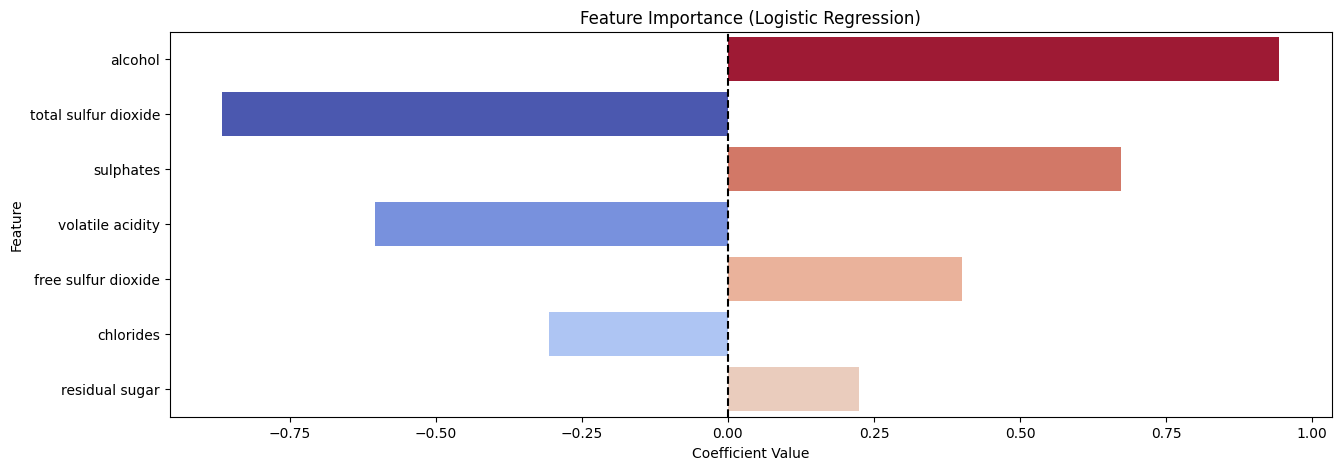

In [22]:
feature_importance = pd.DataFrame(
    {"Feature": significant_features, "Coefficient": result.params[1:]}
)

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(
    by="Abs_Coefficient", ascending=False
)

plt.figure(figsize=(15, 5))
sns.barplot(
    y=feature_importance["Feature"],
    x=feature_importance["Coefficient"],
    palette="coolwarm",
    hue=feature_importance["Coefficient"],
    legend=False,
)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Logistic Regression)")
plt.axvline(0, color="black", linestyle="--")
plt.show()

**Key Takeaways**
- Alcohol content is the most important factor in predicting good wine (positively associated).

- High Total Sulfur Dioxide and Volatile Acidity negatively impact wine quality.

- Sulphates and Free Sulfur Dioxide help predict good wine, but not as strongly as alcohol.

- Residual sugar and chlorides have some negative influence but are less impactful than sulfur dioxide.

### Model Fit 

In [23]:
y_train_probs = result.predict(X_train_const)
y_train_pred = (y_train_probs >= 0.26).astype(int)

print("Classification Report - Train Set:")
print(classification_report(y_train, y_train_pred))


y_test_pred = y_test_pred_final

print("Classification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


train_auc = roc_auc_score(y_train, y_train_probs)
test_auc = roc_auc_score(y_test, y_test_probs)

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Classification Report - Train Set:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1105
           1       0.45      0.64      0.53       174

    accuracy                           0.85      1279
   macro avg       0.70      0.76      0.72      1279
weighted avg       0.87      0.85      0.86      1279

Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       277
           1       0.57      0.67      0.62        43

    accuracy                           0.89       320
   macro avg       0.76      0.80      0.78       320
weighted avg       0.90      0.89      0.89       320

Train AUC: 0.8741
Test AUC: 0.9111


In [24]:
train_probs = result.predict(X_train_const)

train_log_loss = log_loss(y_train, train_probs)
test_log_loss = log_loss(y_test, y_test_probs)
print(f"Train Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")

Train Log Loss: 0.2777
Test Log Loss: 0.2438


#### **Key Findings**
**No Overfitting**
- The test set performance is actually better than the train set, which means the model is generalizing well.

- Overfitting would have shown much higher train performance but lower test performance (which is not the case).

**Balanced Model Fit**
- The AUC scores are close (0.874 vs. 0.911), meaning the model is not memorizing the train data but generalizing well to unseen data.

- The F1-score and recall for the minority class (Good Wine) are reasonably balanced.

**Class Imbalance Still Affects the Model**
- The Precision for "Good" wines (Class 1) is lower than for "Not Good" wines (Class 0).

- The model is more confident in predicting "Not Good" wines correctly but still struggles with misclassifying some good wines.


## Overall Insights and Recommendations

**Business Decision:**

- The chosen threshold balances recall and precision for consistent wine classification.

- The model is suitable if the priority is identifying most good wines (67% recall) while maintaining reasonable precision (57%).

- Alcohol and sulphates have the strongest impact on perceived wine quality. Adjusting these properties in winemaking could enhance quality.

- Wines with higher volatile acidity or total sulfur dioxide tend to be rated lower—monitoring these properties can help improve quality control.

**Potential Improvements:** 

1. **Feature Engineering**

- Exploring non-linear transformations or adding interaction terms could improve model discriminability.

- Conducting Principal Component Analysis (PCA) might reveal hidden structure in the data.

2. **Ensemble Methods**

- Trying Random Forest, Gradient Boosting (XGBoost), or SVMs could yield better results.

- These models handle non-linearity better and might outperform logistic regression.

3. **Hyperparameter Tuning**
- Using GridSearchCV for regularization (C parameter in logistic regression) could further optimize performance.

4. **Handling Imbalanced Data**
- Trying undersampling or cost-sensitive learning could further reduce misclassifications